# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer:

The goal of this study is to determine which applicants to UCLA will be admitted using data collected from previous applications (GRE scores, GPA's and prestige of previously attended educational institution) from some date to some date.

Hypothesis: The GRE, GPA, and prestige for a given applicant can predict the admissions outcome better than a random guess.

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: 

The dataset is comprised of the following variables:

1. Admit - This is a binary variable (1 - represents acceptance, 0 - represents rejection) Admit is the value we are attempting to predict. 
2. gre - a continuous variable between 220 and 800. It represents the student's score on the GRE. 
3. gpa - a continuous variable between 2.26 and 4.00 that represents the grade point average of the applicant during undergrad
4. prestige - a categorical variable from 1 to 4 that represents the prestige of the applicant's undergrad school. (1 being (1 being the most prestigious) 

Cleaning Procedures:

1. Loaded data using pandas from CSV to a DataFrame using pandas.read_csv(filename)
2. Used dataFrame.dropna() to remove any rows that contained NaN values
3. used dataFrame['prestige'].get_dummies(prefix='prestige') to split the categorical variable out
4. Rejoined the dummy variables back to the data frame

### Demo: Provide a table that explains the data by admission status

Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA | 573(116.05)  | 618(109.26)
GRE |3.35(0.38) | 3.49(0.37)
Prestige 1 | 10.3% | 26.2%
Prestige 2 | 35% | 42%
Prestige 3 | 34.3% | 22.2%
Prestige 4 | 20.3% | 9.5%

*** Note my frequencies for Prestige level were calculated against the admitted and not admitted groups. For example, if 100 total applicants were not admitted and 10 of those were from a prestige of 1, then the frequency would be 10%. This could have been calculated differently by going along each group - For instance, the those not admitted from prestige one divided by the total applicants from pretige 1

### Methods: Write up the methods used in your analysis

Answer: The classification was accomplished using the Logit function from the python package statsmodels verions 0.6.1

The odds ratio was calculated for each variable both by hand before running the model using via pandas crosstab function and by transforming the logistic regression coefficients. 

Upon training the model with Logit, I created a set of dummy values and used the trained model to generate a probability for each outcome... aka predicting future outcomes

### Results: Write up your results

Answer:

I found that a 1 unit increase in GPA increased an applicants odds by a factor of 2. 

With Prestige level 1 being the reference point, as that is the dummy variable dropped, the odds of acceptance for prestige 2 is 0.5 that of prestige 1. Furthermore, prestige 3 and and prestige 4 had odds .26 and .21 compared to prestige 1 respecitvely. 

This indicates that the higher the GPA of an applicant and the more prestigious an applicants edcuation both increase the likelihood of acceptance. 

### Visuals: Provide a table or visualization of these results

Besides the stratification of gre and gpa by prestige level, there are a few more visualizations from data exploration at the bottom of the notebook.

<img src='../assets/images/figure1.jpg' height= 75% width= 75%>

<img src='../assets/images/figure2.jpg' height= 75% width= 75%>

### Discussion: Write up your discussion and future steps

Answer: The probability of acceptance to UCLA's graduate program increases with better gpa and prestige levels. So UCLA will more likely accept a student with a higher gpa from a better school than an individual with lower gpa and a less prestigious school. 

Further steps could include gather further data such as diversity statistics (age, race, gender). These could be used to further predict if admissions can be predicted based on diversity facets.

Data for previous years could be used to generate a time series to determine if admissions probability has standards have changed over time. 

Finally, data could be collected for students that have graduated from UCLA's graduated program (GPA, research funding, etc) and paired with admission statistics to determine if the information provided to UCLA at time of acceptance determines the performance of students in graduate school

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../assets/admissions.csv')

In [3]:
data.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [4]:
data.dropna().admit.mean()

0.31738035264483627

In [5]:
data.describe()

/Users/kmacneneyjr/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


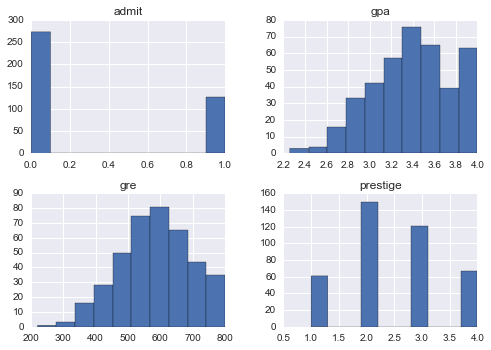

In [6]:
data.hist();

,admit,gre,gpa,prestige
admit,1.000000,0.182919,0.175952,-0.241355
gre,0.182919,1.000000,0.382408,-0.124533
gpa,0.175952,0.382408,1.000000,-0.059031
prestige,-0.241355,-0.124533,-0.059031,1.000000


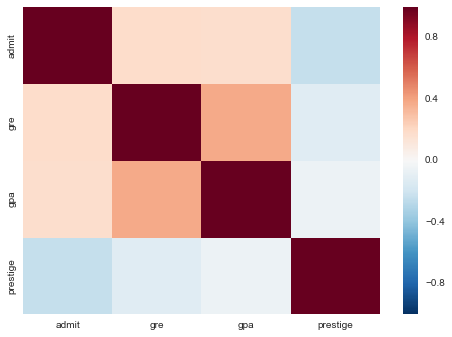

In [7]:
cormat = data.corr()
sns.heatmap(cormat);
cormat

In [24]:
df = data.dropna()
dummies = pd.get_dummies(df['prestige'],prefix='prestige')
newData = df[['admit','gre','gpa']].join(dummies.loc[:, 'prestige_1':])
grouped = newData.groupby(newData['admit'])
grouped.mean().transpose()
grouped.sum()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
admit,,,,,,,
0,0,155440.0,907.08,28.0,95.0,93.0,55.0
1,126,77940.0,439.64,33.0,53.0,28.0,12.0


In [9]:
grouped.std().transpose()

admit,0,1
admit,0.000000,0.000000
gre,116.052798,109.257233
gpa,0.376355,0.371655
prestige_1.0,0.304941,0.441426
prestige_2.0,0.478026,0.495632
prestige_3.0,0.475647,0.417399
prestige_4.0,0.402941,0.294715
